In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #To load KML files

# VEST PA Validation

In [2]:
vest_pa_16 = gp.read_file("./raw-from-source/VEST/pa_2016/pa_2016.shp")

# Documentation Election Results

Election results from the Pennsylvania Secretary of State's office via OpenElections (https://github.com/openelections/openelections-data-pa/). Precinct data was corrected with canvass reports for the following counties: Cumberland, Elk, Lancaster, Northampton, Susquehanna. The candidate totals for Northampton and Susquehanna differ from the county totals reported by the state and therefore the statewide totals differ from the official results accordingly.

Allegheny County reported president-only votes countywide. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2016 election cycle. While some edits reflect official updates to wards or divisions the great majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries, in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where significant numbers of numbers were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

The following revisions were made to the base shapefiles to match the de facto 2016 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are noted at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

Adams: Adjust Cumberland, Franklin
Allegheny: Merge CD splits for S Fayette 3/5; Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12, Align McCandless with municipal boundary; Adjust Avalon, Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg
Armstrong: Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo
Beaver: Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley
Bedford: Adjust Bedford Boro, Bedford Twp
Berks: Merge CD splits for District, Exeter 5; Split Laureldale 1A/B by CD; Adjust Cumru, Douglass, Oley, Maxatawny, Robeson, Sinking Spring, Spring, Union
Blair: Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp
Bucks: Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill
Butler: Merge CD splits for Cranberry E 2, 3, Cranberry W 1, 2, Jefferson 1, 2; Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople
Cambria: Split Johnstown CT 1/2, W8 1/2, W11/OC, Reade N/S; Realign E Taylor 1/2 into 1-4; Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
Cameron: Adjust Emporium, Shippen
Clarion: Split Farmington Central into South/West; Merge Emlenton/Richland
Carbon: Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill
Centre: Merge CD splits for Halfmoon E Central/Proper; Merge Ferguson Northeast 1 A/B; Adjust Benner, College, Ferguson, Patton
Chester: Merge CD/LD splits for Birmingham 2, Phoenixville M 1; Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown
Clarion: Adjust Clarion, Highland, Farmington, Knox
Clearfield: Adjust Bradford, Cooper, Decatur, Golden Rod, Lawrence Glen Richie, Morris, Plympton, Woodward
Columbia: Merge Ashland/Conyngham; Adjust Orange, Scott West
Crawford: Align Mead, Woodcock with municipal boundaries
Cumberland: Merge CD splits for N Middleton 1, 3; Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries
Dauphin: Split Highspire 1/2, Millersburg 1/2, Steelton 2/3, Susquehanna 1/3; Merge Swatara 10 into 6/8; Align Middletown 2-1/3-1 with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown, Swatara
Delaware: Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence
Elk: Split N/S Horton; Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys
Erie: Split Corry 3/4; Merge Mill Creek 23/25; Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East
Fayette: Split Masontown 1/2, Washington 1/2; Align Dunbar with municipal boundary; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone
Franklin: Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington
Fulton: Align McConnellsburg with municipal boundary
Greene: Align Carmichaels with municipal boundary; Adjust Cumberland, Dunkard, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin
Huntingdon: Adjust Huntingdon, Mount Union, Shirley
Jefferson:  Align Reynoldsville with municipal boundary; Adjust Punxsutawney
Lackawanna: Split Olyphant Ward 3-2 A/B; Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop
Lancaster: Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W6, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Boro, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield
Lawrence: Adjust Neshannock
Lebanon: Adjust Jackson, Lickdale, S Lebanon, Union Green Pt
Lehigh: Adjust Lower Macungie, Salisbury
Luzerne: Merge CD splits for Hazle 1; Align Avoca, Pittston with municipal boundaries; Adjust Butler, Dallas Boro, Dallas Twp, Exeter, Foster, Freeland, Hanover, Hazle, Jenkins, Kingston Boro, Kingston Twp, Larksville, Lehman, Nanticoke, Newport, Plains, Salem, Smoyersville, W Wyoming, Wilkes-Barre
Lycoming: Align Williamsport with municipal boundary; Adjust Jersey Shore
McKean: Adjust Bradford City, Bradford Twp, Foster, Keating, Otto
Mercer: Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, S Pymatuning, W Salem
Monroe: Merge CD splits for Smithfield 1; Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield
Montgomery: Merge CD splits for Franconia 2, Horsham 2-1, 4-2, Lower Merion 12-2, 12-3; Add CD splits for Hatfield 5-2, Horsham 2-2, Lower Merion 2-2, Perkiomen 1, Plymouth 2-3; Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence
Northampton: Add CD split for Bethlehem W17; Reverse 2017 Bethlehem Twp redistricting; Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams
Northumberland: Merge CD splits for Upper Mahanoy; Split Riverside A/B; Align Northumberland with municipal boundary; Adjust Coal, Milton, Mount Carmel W, Natalie-Strong, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
Philadelphia: Merge 5-30 into 5-10/16/26/27; 5-31 into 5-25; 5-32 into 5-17; 5-33/34 into 5-21; 18-18 into 18-1/9; Adjust 27-7/8, 43-1/24, 51-3/8, 51-4/20, 57-10/27, 62-8/12, 65-4/7
Pike: Adjust Matamoras
Potter: Adjust Galeton, Sharon
Schuylkill: Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville
Somerset: Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro
Susquehanna: Adjust Montrose; Lanesboro, Susquehanna Depot
Tioga: Add CD splits for Shippen; Adjust Delmar, Wellsboro
Union: Adjust Buffalo, White Deer
Venango: Split Cornplanter 1/2; Split Sugarcreek 1/4; Adjust Franklin, Sugarcreek, Cornplanter, Oil City
Warren: Adjust Conewango
Washington: Split Canton 1/3; Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donegal, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, S Strabane, Union Washington, W Brownsville
Wayne: Adjust Honesdale
Westmoreland: Split Ligonier 1/2; Merge CD splits for Unity Pleasant Unity; Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, Murraysville, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood
Wyoming: Split Nicholson Borough; Adjust Falls
York: Merge CD splits for York Twp 5-3; Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15

## Election Results

#### Load a FIPS file

In [3]:
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Pennsylvania"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)
fips_file["unique_ID"] =  "42" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()
pa_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#### Load election results

In [4]:
pa_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2016/20161108__pa__general__precinct.csv")

In [5]:
print(pa_election.head())

  county      precinct     office  district        candidate party  votes
0  Adams   ABBOTTSTOWN  President       NaN  HILLARY CLINTON   DEM    119
1  Adams  ARENDTSVILLE  President       NaN  HILLARY CLINTON   DEM    143
2  Adams  BENDERSVILLE  President       NaN  HILLARY CLINTON   DEM     83
3  Adams       BERWICK  President       NaN  HILLARY CLINTON   DEM    257
4  Adams   BIGLERVILLE  President       NaN  HILLARY CLINTON   DEM    148


In [6]:
office_list = ['President', 'U.S. Senate', 'Attorney General', 'Auditor General','State Treasurer']

pa_election = pa_election[pa_election["office"].isin(office_list)]


In [7]:
print(pa_election.head())

  county      precinct     office  district        candidate party  votes
0  Adams   ABBOTTSTOWN  President       NaN  HILLARY CLINTON   DEM    119
1  Adams  ARENDTSVILLE  President       NaN  HILLARY CLINTON   DEM    143
2  Adams  BENDERSVILLE  President       NaN  HILLARY CLINTON   DEM     83
3  Adams       BERWICK  President       NaN  HILLARY CLINTON   DEM    257
4  Adams   BIGLERVILLE  President       NaN  HILLARY CLINTON   DEM    148


In [8]:
pa_election["candidate"].unique()

array(['HILLARY CLINTON', 'Donald J. Trump', 'DARRELL L CASTLE',
       'JILL STEIN', 'GARY E JOHNSON', 'KATIE MCGINTY',
       'PATRICK J TOOMEY', 'EDWARD T CLIFFORD III', 'JOSHUA D SHAPIRO',
       'JOHN C RAFFERTY JR', 'EUGENE A DEPASQUALE', 'JOHN A BROWN',
       'JOHN J. SWEENEY', 'ROY A MINET', 'JOSEPH M TORSELLA',
       'OTTO W VOIT III', 'KRISTIN COMBS', 'JAMES BABB'], dtype=object)

In [9]:
pa_election["county"] = pa_election["county"].map(pa_fips_dict).fillna(pa_election["county"])

In [10]:
pa_election["pivot_col"] = pa_election["county"]+pa_election["precinct"]

In [11]:
pivoted_2016 = pd.pivot_table(pa_election, values=["votes"], index=["pivot_col"],columns=["candidate"],aggfunc=sum)

In [12]:
print(pivoted_2016.head())
pivoted_2016.reset_index(drop=False,inplace=True)
pivoted_2016.columns = pivoted_2016.columns.droplevel(0)
print(pivoted_2016.head())

                           votes                                        \
candidate       DARRELL L CASTLE Donald J. Trump EDWARD T CLIFFORD III   
pivot_col                                                                
001ABBOTTSTOWN                 2             274                    32   
001ARENDTSVILLE                2             235                    20   
001BENDERSVILLE                1             153                    16   
001BERWICK                     2             816                    71   
001BIGLERVILLE                 3             314                    33   

                                                                               \
candidate       EUGENE A DEPASQUALE GARY E JOHNSON HILLARY CLINTON JAMES BABB   
pivot_col                                                                       
001ABBOTTSTOWN                  132             13             119          8   
001ARENDTSVILLE                 152              7             143         10   
00

In [13]:
print(pivoted_2016.columns)

Index(['', 'DARRELL L CASTLE', 'Donald J. Trump', 'EDWARD T CLIFFORD III',
       'EUGENE A DEPASQUALE', 'GARY E JOHNSON', 'HILLARY CLINTON',
       'JAMES BABB', 'JILL STEIN', 'JOHN A BROWN', 'JOHN C RAFFERTY JR',
       'JOHN J. SWEENEY', 'JOSEPH M TORSELLA', 'JOSHUA D SHAPIRO',
       'KATIE MCGINTY', 'KRISTIN COMBS', 'OTTO W VOIT III', 'PATRICK J TOOMEY',
       'ROY A MINET'],
      dtype='object', name='candidate')


In [14]:
pivoted_2016.columns=["pivot_col","G16PRECCAS","G16PRERTRU","G16USSLCLI","G16AUDDDEP","G16PRELJOH",
                     "G16PREDCLI","G16TRELBAB","G16PREGSTE","G16AUDRBRO","G16ATGRRAF","G16AUDGSWE",
                     "G16TREDTOR","G16ATGDSHA","G16USSDMCG","G16TREGCOM","G16TRERVOI","G16USSRTOO",
                     "G16AUDLMIN"]

In [15]:
print(vest_pa_16.columns)

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G16PREDCLI', 'G16PRERTRU',
       'G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO',
       'G16USSLCLI', 'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO',
       'G16AUDLMIN', 'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB',
       'G16TREGCOM', 'geometry'],
      dtype='object')


In [16]:
pivoted_2016["NAME"]=pivoted_2016["pivot_col"].str[3:]
pivoted_2016["COUNTYFP"]=pivoted_2016["pivot_col"].str[0:3]

In [17]:
pivoted_2016 = pivoted_2016[["COUNTYFP","NAME",'G16PREDCLI', 'G16PRERTRU',
       'G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO',
       'G16USSLCLI', 'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO',
       'G16AUDLMIN', 'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB',
       'G16TREGCOM']]

In [18]:
print(pivoted_2016.head())

  COUNTYFP          NAME  G16PREDCLI  G16PRERTRU  G16PRELJOH  G16PREGSTE  \
0      001   ABBOTTSTOWN         119         274          13           3   
1      001  ARENDTSVILLE         143         235           7           2   
2      001  BENDERSVILLE          83         153          15           5   
3      001       BERWICK         257         816          24          10   
4      001   BIGLERVILLE         148         314          13           3   

   G16PRECCAS  G16USSDMCG  G16USSRTOO  G16USSLCLI  G16ATGDSHA  G16ATGRRAF  \
0           2         128         256          32         145         267   
1           2         141         232          20         153         238   
2           1          83         159          16          96         158   
3           2         289         745          71         304         788   
4           3         150         306          33         164         320   

   G16AUDDDEP  G16AUDRBRO  G16AUDLMIN  G16AUDGSWE  G16TREDTOR  G16TRERVOI  \
0  

In [19]:
data_columns = ['G16PREDCLI', 'G16PRERTRU',
       'G16PRELJOH', 'G16PREGSTE', 'G16PRECCAS', 'G16USSDMCG', 'G16USSRTOO',
       'G16USSLCLI', 'G16ATGDSHA', 'G16ATGRRAF', 'G16AUDDDEP', 'G16AUDRBRO',
       'G16AUDLMIN', 'G16AUDGSWE', 'G16TREDTOR', 'G16TRERVOI', 'G16TRELBAB',
       'G16TREGCOM']

print(vest_pa_16.shape)
print(pivoted_2016.shape)

(9167, 23)
(9123, 20)


In [20]:
for i in data_columns:
    print(i)
    print(sum(vest_pa_16[i]))
    print(sum(pivoted_2016[i]))
    print("")

G16PREDCLI
2926444
2925710

G16PRERTRU
2971198
2970426

G16PRELJOH
146716
146659

G16PREGSTE
49941
49935

G16PRECCAS
21572
21566

G16USSDMCG
2865012
2865009

G16USSRTOO
2951702
2951706

G16USSLCLI
235142
235142

G16ATGDSHA
3057010
3057013

G16ATGRRAF
2891325
2891322

G16AUDDDEP
2958818
2958819

G16AUDRBRO
2667318
2667318

G16AUDLMIN
131853
131853

G16AUDGSWE
158942
158944

G16TREDTOR
2991404
2991405

G16TRERVOI
2610811
2610810

G16TRELBAB
135132
135132

G16TREGCOM
170275
170276



In [21]:
diff_counties = []

for i in data_columns:
    diff = pivoted_2016.groupby(["COUNTYFP"]).sum()[i]-vest_pa_16.groupby(["COUNTYFP"]).sum()[i]
    print(i)
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    print(diff[diff != 0])
    print("")

#print(diff_counties)
fips_name_dict=dict(zip(fips_file["FIPS County"],fips_file["County Name"]))
#print(fips_name_dict)
for i in diff_counties:
    print(fips_name_dict.get(i))

G16PREDCLI
COUNTYFP
003   -683
095     -3
115    -48
Name: G16PREDCLI, dtype: int64

G16PRERTRU
COUNTYFP
003   -355
115   -417
Name: G16PRERTRU, dtype: int64

G16PRELJOH
COUNTYFP
003   -56
115    -1
Name: G16PRELJOH, dtype: int64

G16PREGSTE
COUNTYFP
003   -6
Name: G16PREGSTE, dtype: int64

G16PRECCAS
COUNTYFP
003   -6
Name: G16PRECCAS, dtype: int64

G16USSDMCG
COUNTYFP
095   -3
Name: G16USSDMCG, dtype: int64

G16USSRTOO
COUNTYFP
095    4
Name: G16USSRTOO, dtype: int64

G16USSLCLI
Series([], Name: G16USSLCLI, dtype: int64)

G16ATGDSHA
COUNTYFP
095    3
Name: G16ATGDSHA, dtype: int64

G16ATGRRAF
COUNTYFP
095   -3
Name: G16ATGRRAF, dtype: int64

G16AUDDDEP
COUNTYFP
095    1
Name: G16AUDDDEP, dtype: int64

G16AUDRBRO
Series([], Name: G16AUDRBRO, dtype: int64)

G16AUDLMIN
Series([], Name: G16AUDLMIN, dtype: int64)

G16AUDGSWE
COUNTYFP
095    2
Name: G16AUDGSWE, dtype: int64

G16TREDTOR
COUNTYFP
095    1
Name: G16TREDTOR, dtype: int64

G16TRERVOI
COUNTYFP
095   -1
Name: G16TRERVOI, dtype: i

In [22]:
#COUNTYFP+"NAME" is a unique ID here
print(pivoted_2016.shape)
pivoted_2016["NAME"] = pivoted_2016["NAME"].str.upper()
print((pivoted_2016["COUNTYFP"]+pivoted_2016["NAME"]).nunique())

# "COUNTYFP" + "NAME" is not a unique ID here
print(vest_pa_16.shape)
print((vest_pa_16["COUNTYFP"]+vest_pa_16["NAME"]).nunique())

pivoted_2016["election_check_join"] = pivoted_2016["COUNTYFP"]+pivoted_2016["NAME"]
vest_pa_16["election_check_join"] = vest_pa_16["COUNTYFP"]+vest_pa_16["NAME"]

(9123, 20)
9123
(9167, 23)
9118


In [23]:
ser = (vest_pa_16["COUNTYFP"]+vest_pa_16["NAME"]).value_counts()
print(ser[ser>1])
dup_list = list(ser[ser>1].index)

123SUGAR GROVE             2
019FAIRVIEW                2
085SANDY LAKE              2
115GREAT BEND              2
015WYALUSING               2
009WOODBURY                2
117TIOGA                   2
079WILKES-BARRE WARD 01    2
015TROY                    2
019SLIPPERY ROCK           2
111ADDISON                 2
079WILKES-BARRE WARD 02    2
009HOPEWELL                2
033BURNSIDE                2
105OSWAYO                  2
115THOMPSON                2
115NEW MILFORD             2
105ULYSSES                 2
131MESHOPPEN               2
031CLARION DISTRICT 01     2
017NEWTOWN DISTRICT 01     2
037CATAWISSA               2
007DARLINGTON              2
019CONNOQUENESSING         2
037BENTON                  2
113LAPORTE                 2
021GALLITZIN               2
039VENANGO                 2
115OAKLAND                 2
035BEECH CREEK             2
099LIVERPOOL               2
031KNOX                    2
015ROME                    2
103MILFORD                 2
079NESCOPECK  

In [24]:
vest_pa_16["election_check_join_holder"] = vest_pa_16["election_check_join"]
vest_pa_16["election_check_join"] = vest_pa_16["election_check_join"].apply(lambda x: "Don't join" if x in dup_list else x)

In [25]:
vest_pa_16["election_check_join"].value_counts()

Don't join                             98
019ZELIENOPLE DISTRICT 02               1
091LOWER MERION WARD 06 PRECINCT 03     1
085OTTER CREEK                          1
085SHARON DISTRICT 04 DIVISION 02       1
                                       ..
101PHILADELPHIA WARD 35 PRECINCT 08     1
033BLOOM                                1
093LIMESTONE                            1
003SHALER WARD 03 DISTRICT 05           1
039EAST FAIRFIELD                       1
Name: election_check_join, Length: 9070, dtype: int64

In [26]:
join_one = pd.merge(vest_pa_16,pivoted_2016,how="outer",on="election_check_join",indicator=True)
print(join_one["_merge"].value_counts())

left_only     7469
right_only    7425
both          1698
Name: _merge, dtype: int64


## Join on vote strings as a unique ID

In [27]:
pivoted_2016["unique_vote_id"] = ""
vest_pa_16["unique_vote_id"] = ""
for i in data_columns:
    pivoted_2016["unique_vote_id"]+=pivoted_2016[i].astype(str)
    vest_pa_16["unique_vote_id"]+=vest_pa_16[i].astype(str)

In [28]:
print(vest_pa_16["unique_vote_id"].value_counts())
print(pivoted_2016["unique_vote_id"].value_counts())


join_vest_pa_16 = vest_pa_16[vest_pa_16["unique_vote_id"]!="000000000000000000"]
join_pivoted_2016 = pivoted_2016[pivoted_2016["unique_vote_id"]!="000000000000000000"]

print(join_vest_pa_16["unique_vote_id"].value_counts())
print(join_pivoted_2016["unique_vote_id"].value_counts())

000000000000000000                               3
21824271012202468236235202233716209230916        1
148622111485011484614143051523721                1
63855132976016111569053156660714186105701517     1
271805241012934196430545827341832382963873643    1
                                                ..
302232412922642952628722162961823                1
26960027472985257237351339543921293864372633     1
538782331500126850511947711617114821111314       1
3875142994406500194494373874541817439397279      1
2761138612621048280902688461328771410            1
Name: unique_vote_id, Length: 9165, dtype: int64
000000000000000000                               14
24820941032671515331014430711114253021041232      1
27819494326819617282187304148582771651111         1
39256953793836065039861138855236313605652950      1
313163107128818113306171274182715289167617        1
                                                 ..
28177517672877614133973530770928243246952525      1
35241838533564353735845834

In [29]:
source_to_vest_changes = pd.read_csv("./source_to_vest_name_changes.csv")
source_to_vest_changes_dict = dict(zip(source_to_vest_changes["Source"],source_to_vest_changes["VEST"]))

In [30]:
pivoted_2016["election_check_join"] = pivoted_2016["election_check_join"].map(source_to_vest_changes_dict).fillna(pivoted_2016["election_check_join"])

In [31]:
vote_name_hack = pd.merge(join_vest_pa_16,join_pivoted_2016,how="outer",on="unique_vote_id",indicator=True)
print(vote_name_hack["_merge"].value_counts())
left_only = vote_name_hack[vote_name_hack["_merge"]=="left_only"]
right_only = vote_name_hack[vote_name_hack["_merge"]=="right_only"]

left_only.to_csv("./exported_csvs/election_check_only_vest.csv")
right_only.to_csv("./exported_csvs/election_check_only_source.csv")

both          8208
left_only      956
right_only     901
Name: _merge, dtype: int64


In [32]:
changes = vote_name_hack[vote_name_hack["_merge"]=="both"][["VTDST","election_check_join_holder","election_check_join_y"]]

In [33]:
source_to_vest_changes_dict_2 = dict(zip(changes["election_check_join_y"],changes["election_check_join_holder"]))
pivoted_2016["election_check_join"] = pivoted_2016["election_check_join"].map(source_to_vest_changes_dict_2).fillna(pivoted_2016["election_check_join"])

In [34]:
pivoted_2016[pivoted_2016["election_check_join"]=="085SANDY LAKE"]

,COUNTYFP,NAME,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PRECCAS,G16USSDMCG,G16USSRTOO,G16USSLCLI,...,G16AUDDDEP,G16AUDRBRO,G16AUDLMIN,G16AUDGSWE,G16TREDTOR,G16TRERVOI,G16TRELBAB,G16TREGCOM,election_check_join,unique_vote_id
5456,085,SANDY LAKE BORO,65,216,13,3,0,70,203,20,...,67,197,13,12,71,200,8,13,085SANDY LAKE,65216133070203207122167197131271200813
5457,085,SANDY LAKE TWP,125,506,11,3,1,133,483,23,...,139,460,18,15,134,458,17,17,085SANDY LAKE,12550611311334832313649813946018151344581717


In [35]:
print(vest_pa_16["election_check_join"].value_counts())
print(pivoted_2016["election_check_join"].value_counts())

Don't join                             98
019ZELIENOPLE DISTRICT 02               1
091LOWER MERION WARD 06 PRECINCT 03     1
085OTTER CREEK                          1
085SHARON DISTRICT 04 DIVISION 02       1
                                       ..
101PHILADELPHIA WARD 35 PRECINCT 08     1
033BLOOM                                1
093LIMESTONE                            1
003SHALER WARD 03 DISTRICT 05           1
039EAST FAIRFIELD                       1
Name: election_check_join, Length: 9070, dtype: int64
085SANDY LAKE                             2
019ZELIENOPLE DISTRICT 02                 1
003PITCAIRN DISTRICT 02                   1
005SUGARCREEK                             1
111SOUTHAMPTON                            1
                                         ..
003PITTSBURGH WARD 11 DISTRICT 09         1
115LATHROP                                1
055FANNETT DISTRICT CONCORD               1
091SPRINGFIELD DISTRICT 07 DIVISION 01    1
021CAMBRIA DISTRICT REVLOC                1


In [36]:
join_one = pd.merge(vest_pa_16,pivoted_2016,how="outer",on="election_check_join",indicator=True)
print(join_one["_merge"].value_counts())
left_only = join_one[join_one["_merge"]=="left_only"]
right_only = join_one[join_one["_merge"]=="right_only"]

left_only.to_csv("./exported_csvs/final_election_check_only_vest.csv")
right_only.to_csv("./exported_csvs/final_election_check_only_source.csv")

both          8979
left_only      188
right_only     144
Name: _merge, dtype: int64


In [37]:
***EDIT THIS***

SyntaxError: invalid syntax (<ipython-input-37-9d55746a2cf5>, line 1)

In [ ]:
def shp_combiner(new_name,merge_list):
    global shapefiles_census
    prec_holder = []
    countyfp = new_name[0:3]
    vtdst = new_name[3:9] 
    name = new_name[9:]
    for i in merge_list:
        #shapefiles_census.loc[shapefiles_census["cty_pct"]==i,:].plot()
        prec_holder.append(shapefiles_census.loc[shapefiles_census["cty_pct"]==i,:])
    new_geom = pd.concat(prec_holder, ignore_index=True).unary_union
    new_prec = gp.GeoDataFrame(geometry=[new_geom],columns=shapefiles_census.columns,crs = shapefiles_census.crs)
    new_prec["COUNTYFP"] = countyfp
    new_prec["VTDST"] = vtdst
    new_prec["NAME"] = name
    new_prec["cty_pct"] = countyfp+vtdst+name
    new_prec["shp_join"] = countyfp+vtdst
    shapefiles_census = shapefiles_census.append(new_prec)
    shapefiles_census = shapefiles_census[~(shapefiles_census["cty_pct"].isin(merge_list))]

In [ ]:
shp_combiner('00300F397SOUTH FAYETTE DISTRICT 03',['00300F398SOUTH FAYETTE DISTRICT 03 (CD 17)','00300F399SOUTH FAYETTE DISTRICT 03 (CD 18)'])


In [ ]:
print(right_only[right_only["election_check_join"]=="085SANDY LAKE"])

In [ ]:
#Empty precincts

#011ADAMSTOWN
#049LAKE ERIE
#091LOWER MERION WARD 02 DISTRICT 02 B (CD 13)

In [ ]:
def shape_election_merge(prec_list,new_name):
    for i in prec_list:
        

In [ ]:
#Duplicates to validate VEST (name+VTDST)
shape_election_merge(["003BALDWIN DISTRICT 01130","003BALDWIN DISTRICT 01151"],"003BALDWIN DISTRICT 01")
shape_election_merge(["003BALDWIN DISTRICT 02140","003BALDWIN DISTRICT 02161"],"003BALDWIN DISTRICT 02")
shape_election_merge(["007DARLINGTON640","007DARLINGTON630"],"007DARLINGTON")
shape_election_merge(["009HOPEWELL150","009HOPEWELL160"],"009HOPEWELL")
shape_election_merge(["009WOODBURY410","009WOODBURY420"],"009WOODBURY")
shape_election_merge(["015CANTON130","015CANTON140"],"015CANTON")
shape_election_merge(["015BURLINGTON120","015BURLINGTON110"],"015BURLINGTON")
shape_election_merge(["015MONROE230","015MONROE220"],"015MONROE")
shape_election_merge(["015ROME300","015ROME310"],"015ROME")
shape_election_merge(["015TROY510","015TROY500"],"015TROY")
shape_election_merge(["015WYALUSING600","015WYALUSING590"])
shape_election_merge(["017NEWTOWN DISTRICT 021860","017NEWTOWN DISTRICT 021920"],"017NEWTOWN DISTRICT 02")
shape_election_merge(["017NEWTOWN DISTRICT 011910","017NEWTOWN DISTRICT 011850"],"017NEWTOWN DISTRICT 01")
shape_election_merge(["019CONNOQUENESSING330","019CONNOQUENESSING340"],"019CONNOQUENESSING")
shape_election_merge(["019FAIRVIEW430","019FAIRVIEW420"],"019FAIRVIEW")
shape_election_merge(["019SLIPPERY ROCK670","019SLIPPERY ROCK680"],"019SLIPPERY ROCK")
shape_election_merge(["021GALLITZIN636","021GALLITZIN615"],"021GALLITZIN")
shape_election_merge(["027HOWARD300","027HOWARD290"],"027HOWARD")
shape_election_merge(["031CLARION DISTRICT 0150","031CLARION DISTRICT 0170"],"031CLARION DISTRICT 01")
shape_election_merge(["031CLARION DISTRICT 0260","031CLARION DISTRICT 0280"],"031CLARION DISTRICT 02")
shape_election_merge(["031KNOX200","031KNOX210"],"031KNOX")
shape_election_merge(["033BURNSIDE110","033BURNSIDE120"],"033BURNSIDE")
shape_election_merge(["035BEECH CREEK40","035BEECH CREEK50"],"035BEECH CREEK")
shape_election_merge(["037BENTON20","037BENTON30"],"037BENTON")
shape_election_merge(["037CATAWISSA260","037CATAWISSA275"],"037CATAWISSA")
shape_election_merge(["039VENANGO570","039VENANGO580"],"039VENANGO")
shape_election_merge(["039WOODCOCK670","039WOODCOCK660"],"039WOODCOCK")
shape_election_merge(["053TIONESTA100","053TIONESTA110"],"053TIONESTA")
shape_election_merge(["079WILKES-BARRE WARD 012635","079WILKES-BARRE WARD 013075"],"079WILKES-BARRE WARD 01")
shape_election_merge(["079WILKES-BARRE WARD 022655","079WILKES-BARRE WARD 023095"],"079WILKES-BARRE WARD 02")
shape_election_merge(["079NESCOPECK1740","079NESCOPECK1750"],"079NESCOPECK")
shape_election_merge(["083ELDRED160","083ELDRED170"],"083ELDRED")
shape_election_merge(["085SANDY LAKE700","085SANDY LAKE710"],"085SANDY LAKE")
shape_election_merge(["099LIVERPOOL130","099LIVERPOOL140"],"099LIVERPOOL")
shape_election_merge(["103MILFORD90","103MILFORD100"],"103MILFORD")
shape_election_merge(["105OSWAYO190","105OSWAYO180"],"105OSWAYO")
shape_election_merge(["105ULYSSES310","105ULYSSES320"],"105ULYSSES")
shape_election_merge(["107TREMONT1595","107TREMONT1580"],"107TREMONT")
shape_election_merge(["111ADDISON10","111ADDISON20"],"111ADDISON")
shape_election_merge(["113LAPORTE130","113LAPORTE140"],"113LAPORTE")
shape_election_merge(["115GREAT BEND160","115GREAT BEND150"],"115GREAT BEND")
shape_election_merge(["115THOMPSON420","115THOMPSON410"],"115THOMPSON")
shape_election_merge(["115NEW MILFORD320","115NEW MILFORD330"],"115NEW MILFORD")
shape_election_merge(["115OAKLAND340","115OAKLAND350"],"115OAKLAND")
shape_election_merge(["117LIBERTY240","117LIBERTY230"],"117LIBERTY")
shape_election_merge(["117WESTFIELD460","117WESTFIELD445"],"117WESTFIELD")
shape_election_merge(["117TIOGA370","117TIOGA380"],"117TIOGA")
shape_election_merge(["123SUGAR GROVE255","123SUGAR GROVE290"],"123SUGAR GROVE")
shape_election_merge(["131MESHOPPEN130","131MESHOPPEN140"],"131MESHOPPEN")

# Import Shapefile

In [38]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [39]:
#Filter down shapefiles to relevant columns
shapefiles_census = shapefiles_census[["COUNTYFP","VTDST","NAME","geometry"]]

In [40]:
#Look into two possible unique IDs
shapefiles_census["cty_pct"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]+shapefiles_census["NAME"]
shapefiles_census["shp_join"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]
print(shapefiles_census.shape)
print(shapefiles_census["shp_join"].nunique())

(9175, 6)
9175


Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).


## Allegheny (Elizabeth, Pittsburgh W12)

<AxesSubplot:>

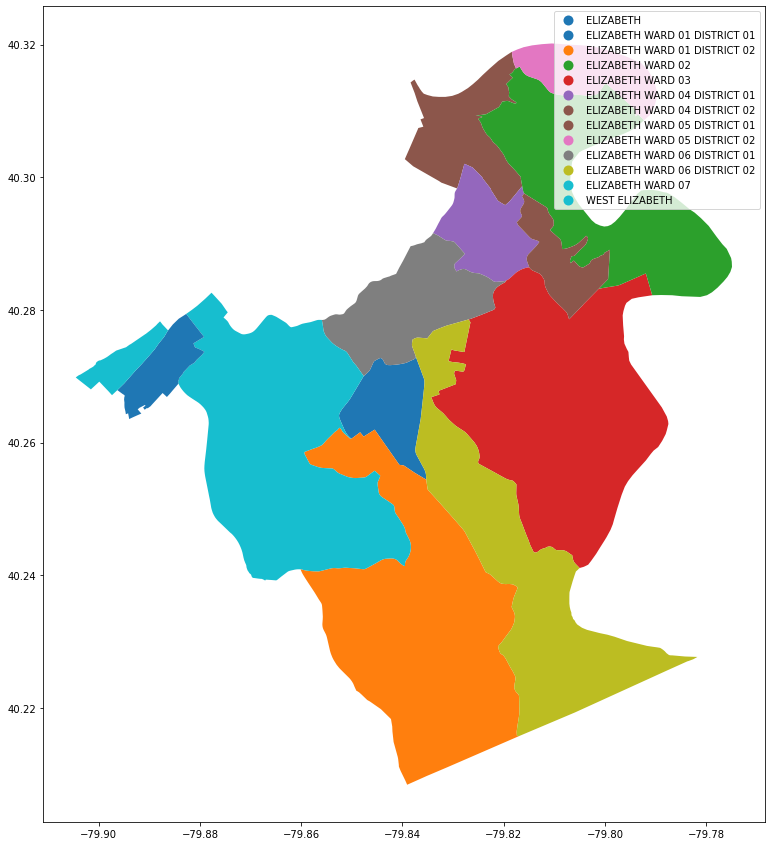

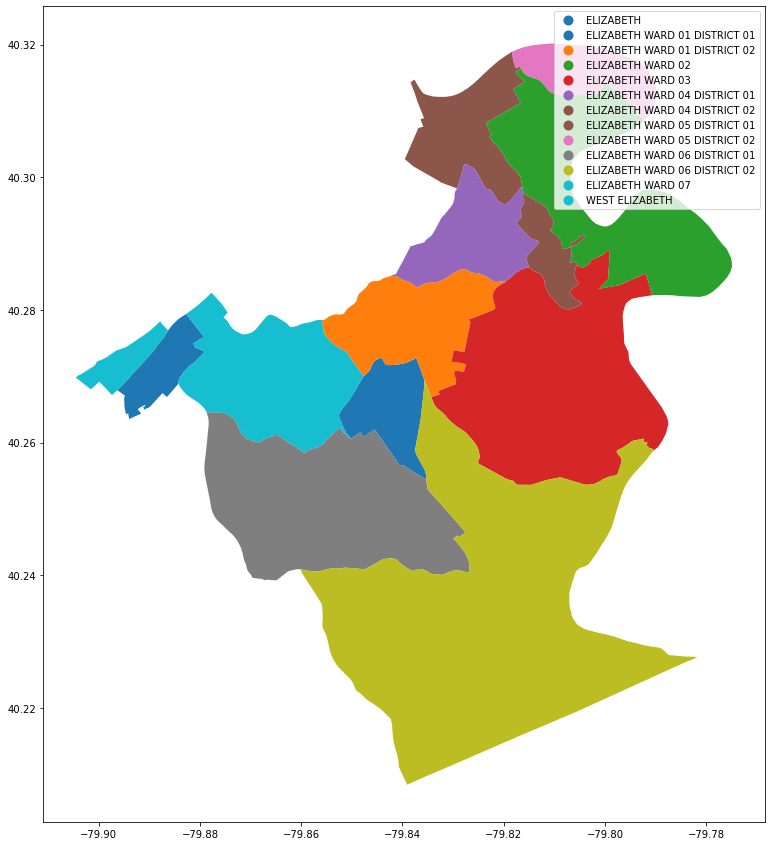

In [42]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("ELIZABETH"))&(shapefiles_census["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("ELIZABETH"))&(vest_pa_16["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))

<AxesSubplot:>

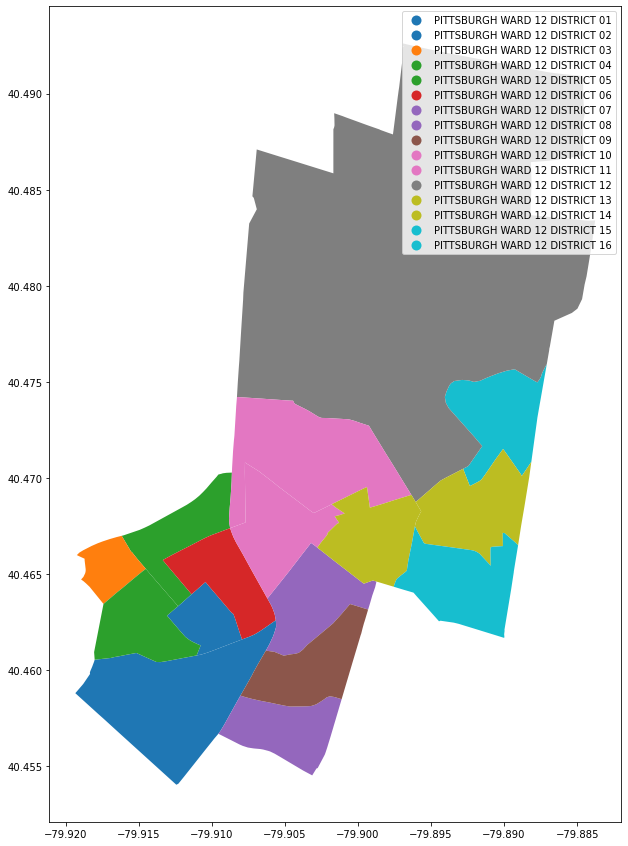

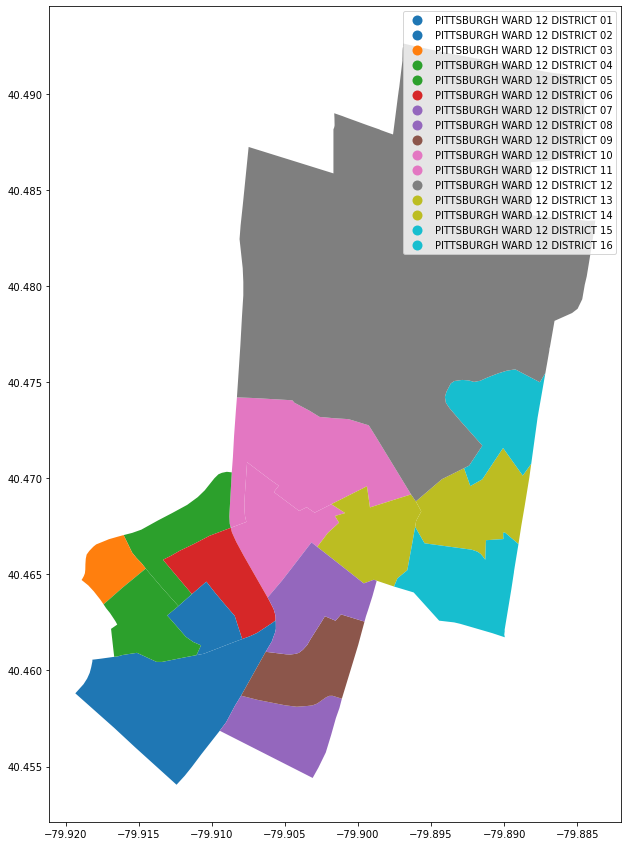

In [43]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("PITTSBURGH WARD 12"))&(shapefiles_census["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("PITTSBURGH WARD 12"))&(vest_pa_16["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))

## Blair (Greenfield)

<AxesSubplot:>

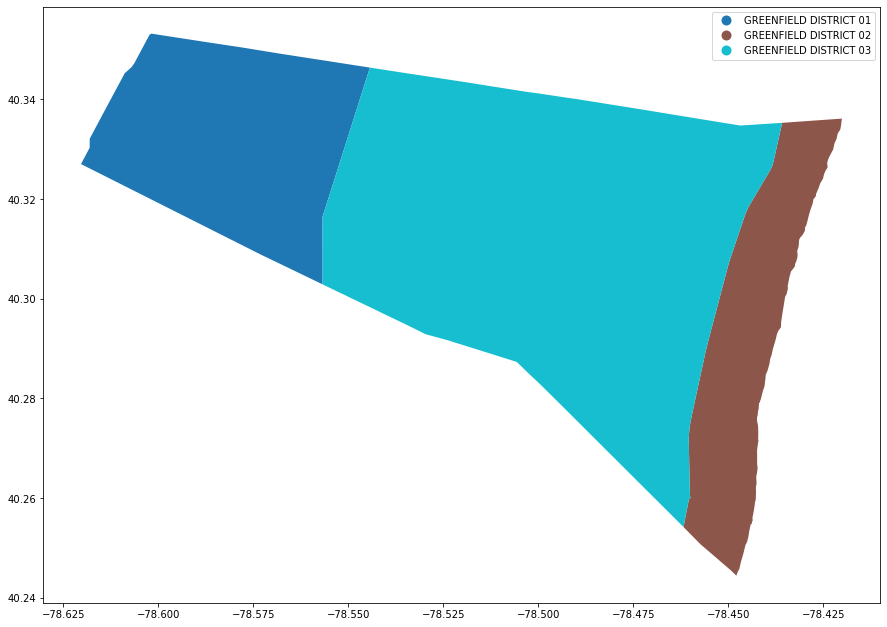

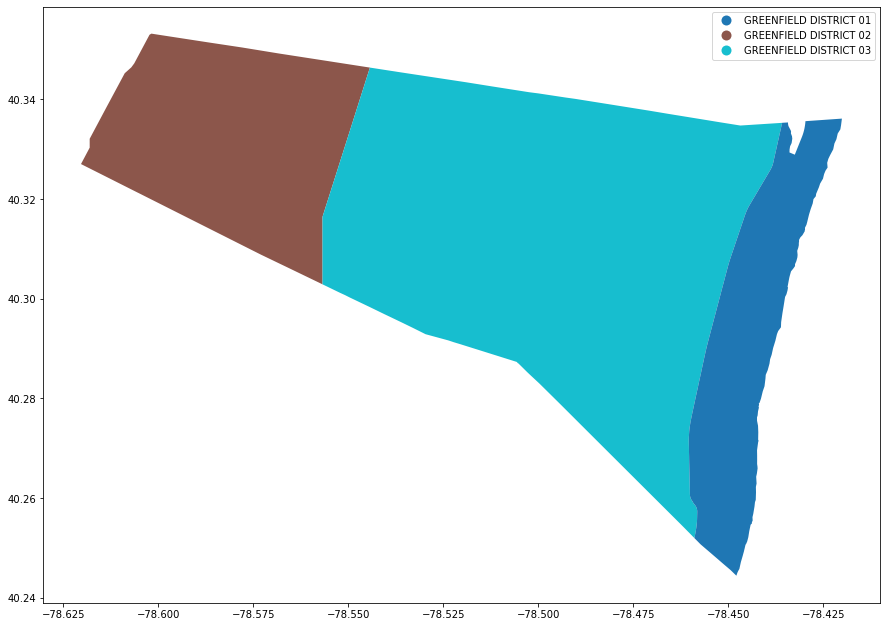

In [44]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("GREENFIELD"))&(shapefiles_census["COUNTYFP"]=="013")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("GREENFIELD"))&(vest_pa_16["COUNTYFP"]=="013")].plot(column="NAME",legend=True,figsize=(15,15))

## Bradford (Athens)

<AxesSubplot:>

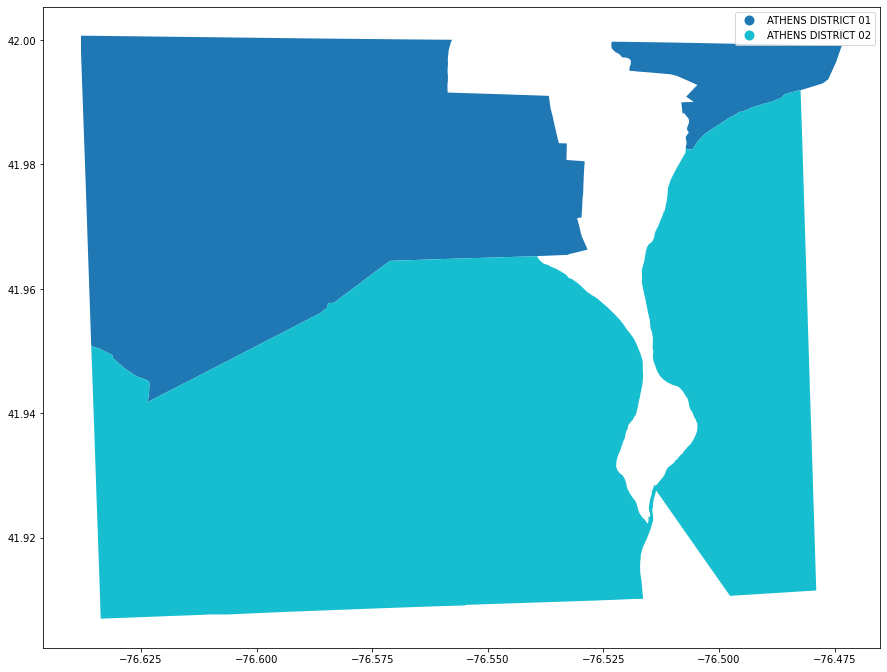

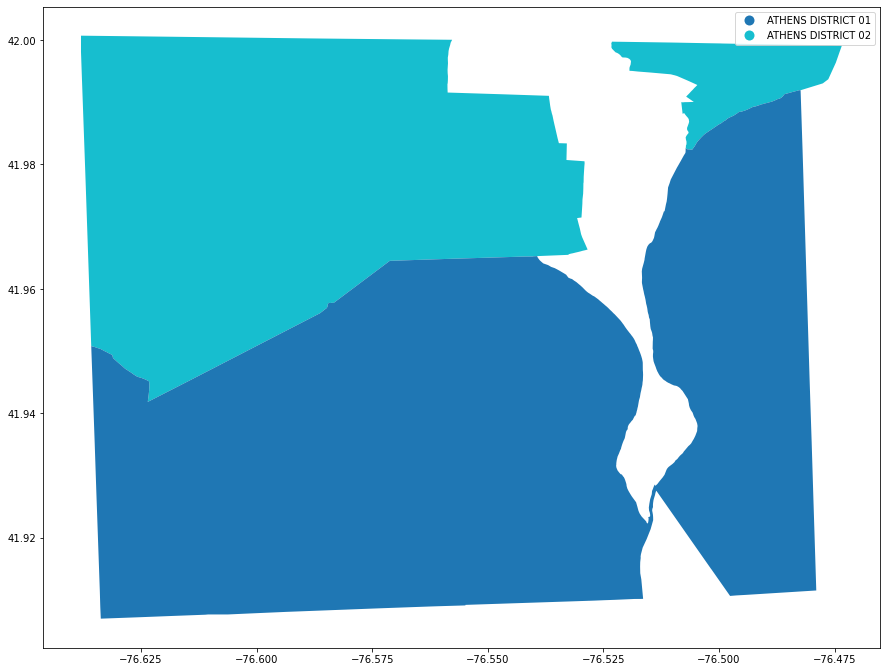

In [45]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("ATHENS DISTRICT"))&(shapefiles_census["COUNTYFP"]=="015")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("ATHENS DISTRICT"))&(vest_pa_16["COUNTYFP"]=="015")].plot(column="NAME",legend=True,figsize=(15,15))

## Greene (Monongahela)

<AxesSubplot:>

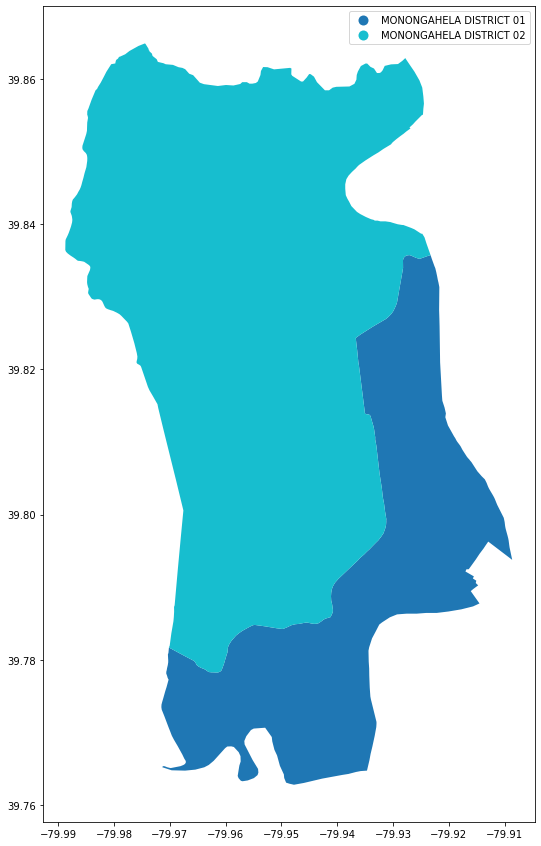

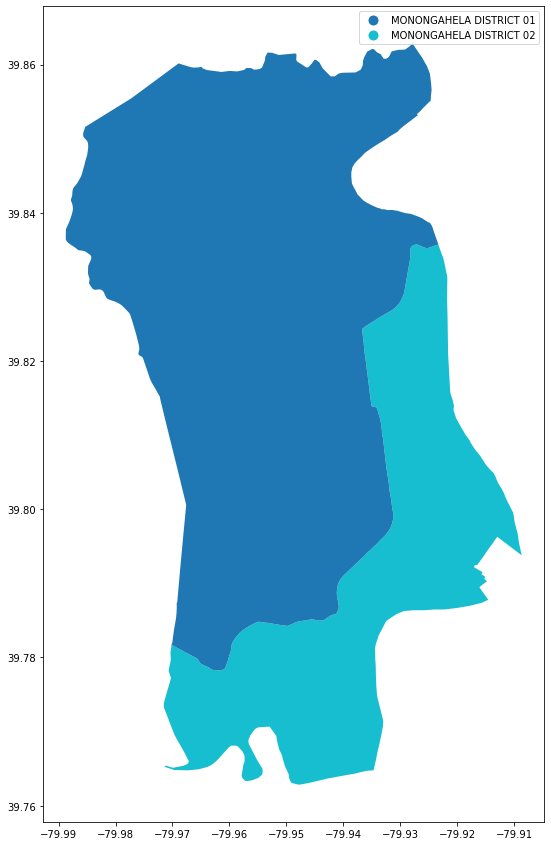

In [47]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("MONONGAHELA"))&(shapefiles_census["COUNTYFP"]=="059")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("MONONGAHELA"))&(vest_pa_16["COUNTYFP"]=="059")].plot(column="NAME",legend=True,figsize=(15,15))

## Monroe (Smithfield)

<AxesSubplot:>

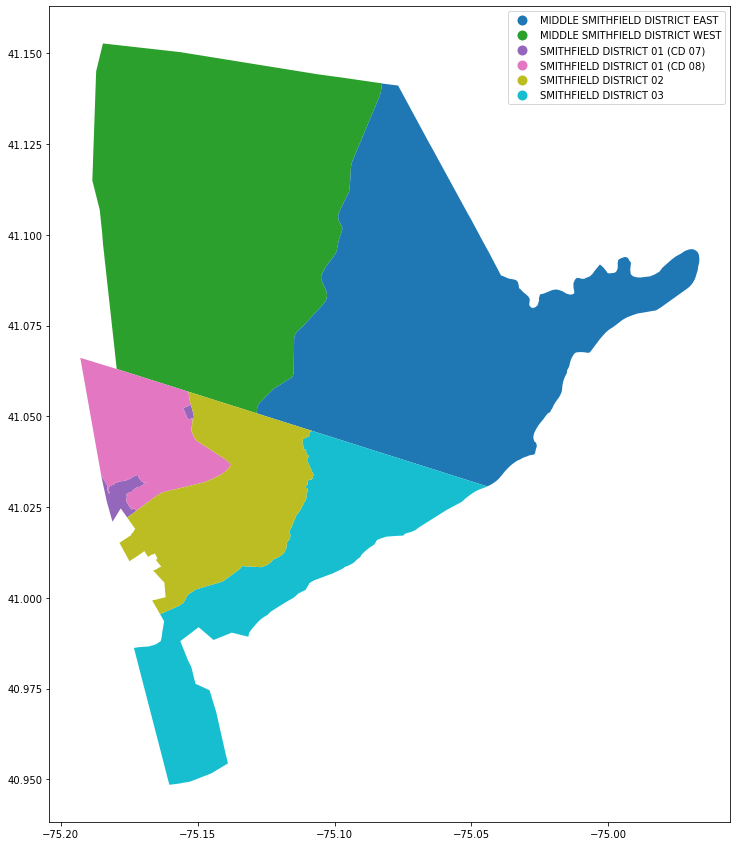

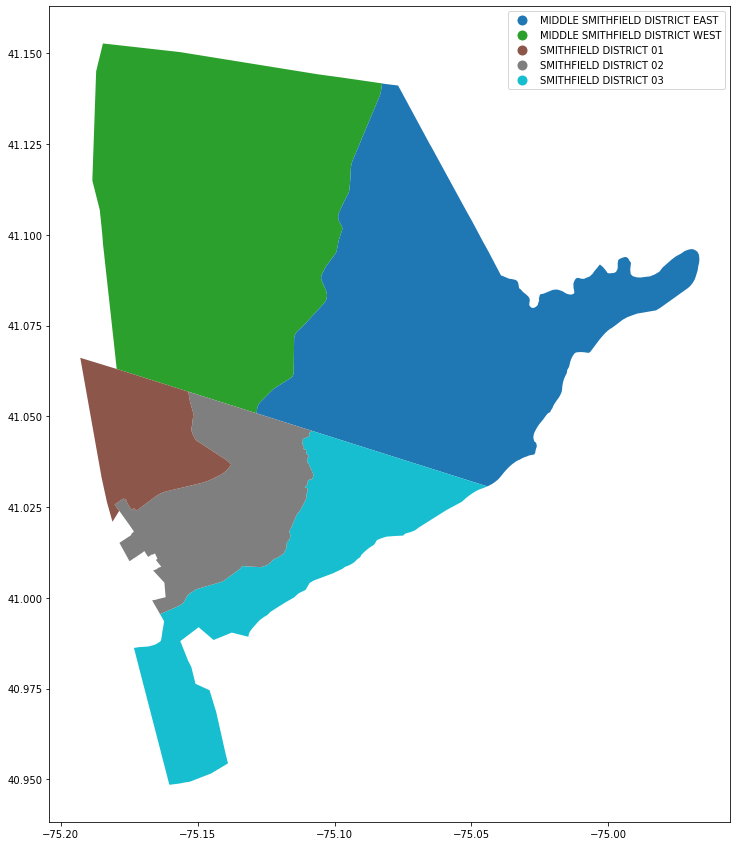

In [48]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("SMITHFIELD"))&(shapefiles_census["COUNTYFP"]=="089")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("SMITHFIELD"))&(vest_pa_16["COUNTYFP"]=="089")].plot(column="NAME",legend=True,figsize=(15,15))

## Montgomery (Hatfield)

<AxesSubplot:>

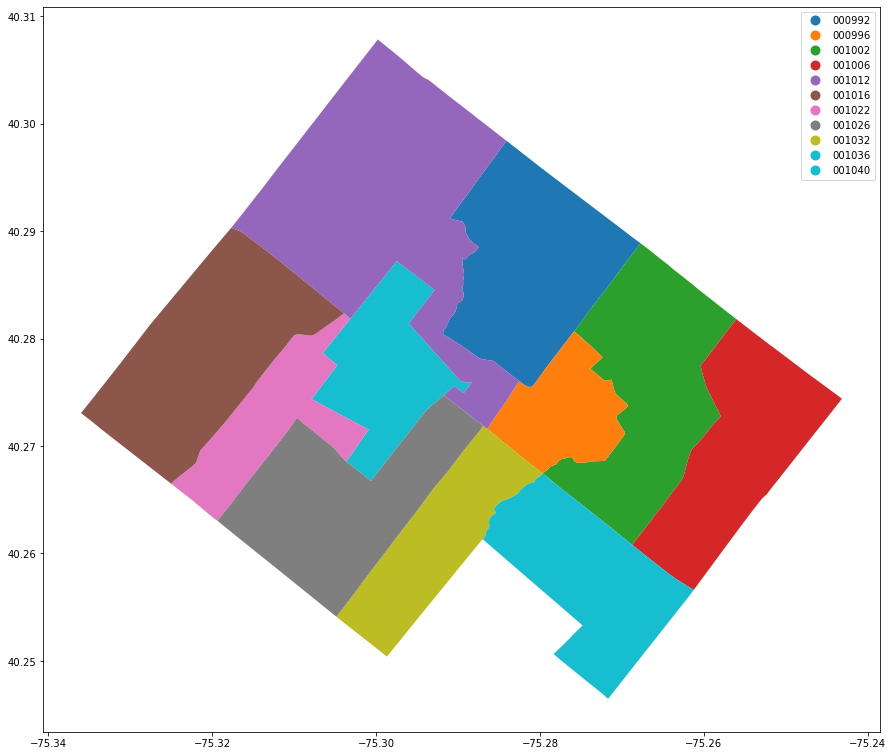

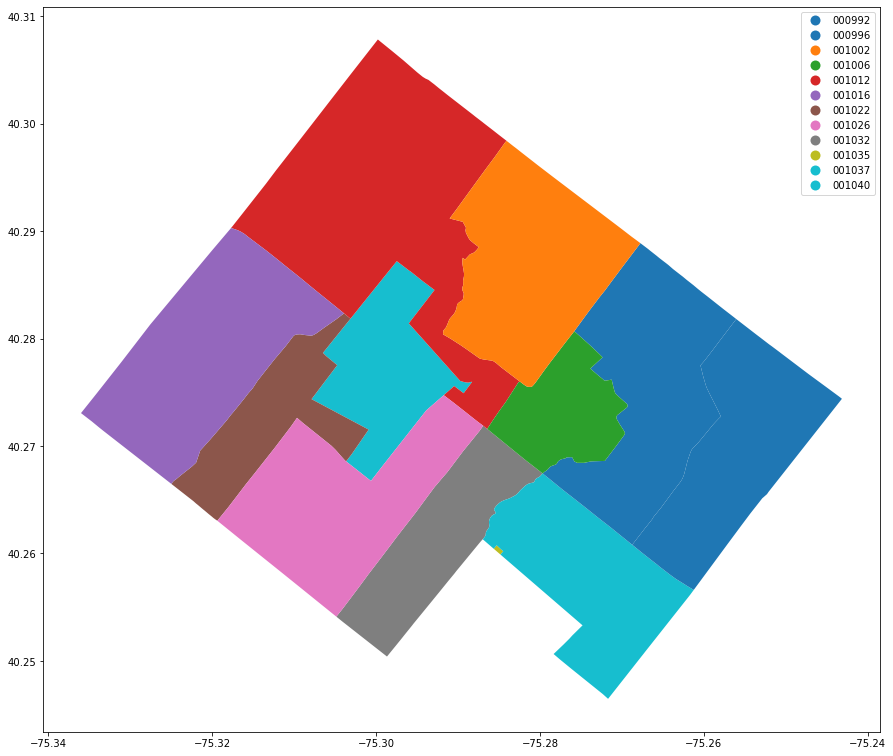

In [49]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("HATFIELD"))&(shapefiles_census["COUNTYFP"]=="091")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("HATFIELD"))&(vest_pa_16["COUNTYFP"]=="091")].plot(column="VTDST",legend=True,figsize=(15,15))

## Northampton (Bethlehem Twp)

<AxesSubplot:>

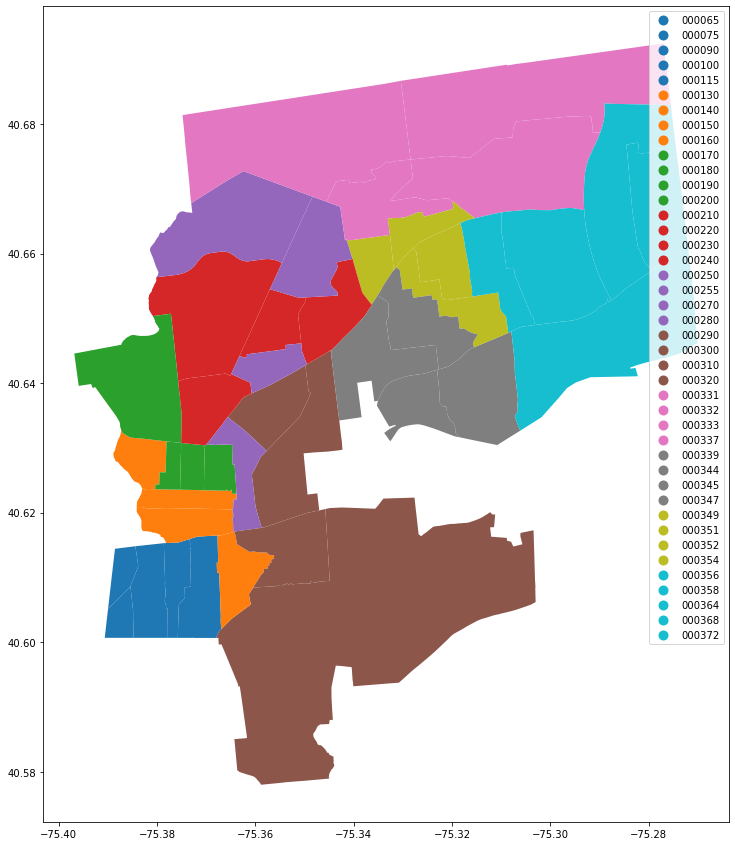

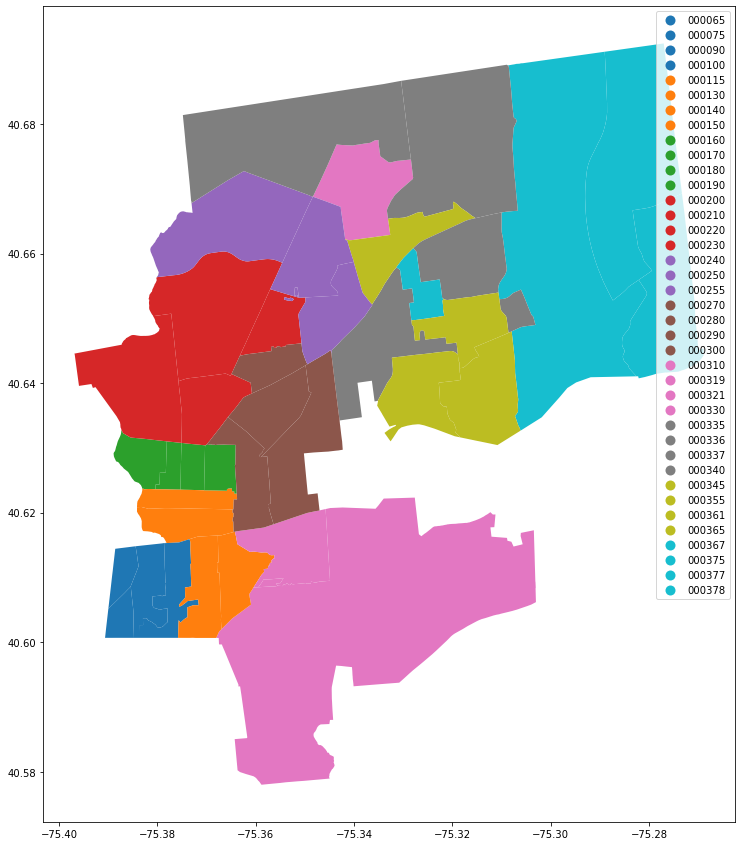

In [50]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("BETHLEHEM"))&(shapefiles_census["COUNTYFP"]=="095")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("BETHLEHEM"))&(vest_pa_16["COUNTYFP"]=="095")].plot(column="VTDST",legend=True,figsize=(15,15))

## Perry (Toboyne)

<AxesSubplot:>

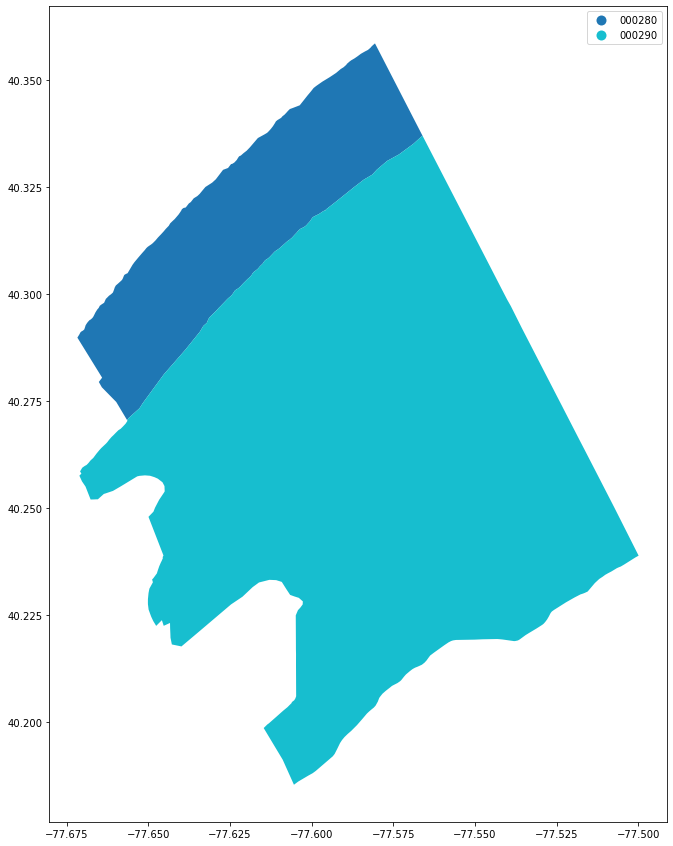

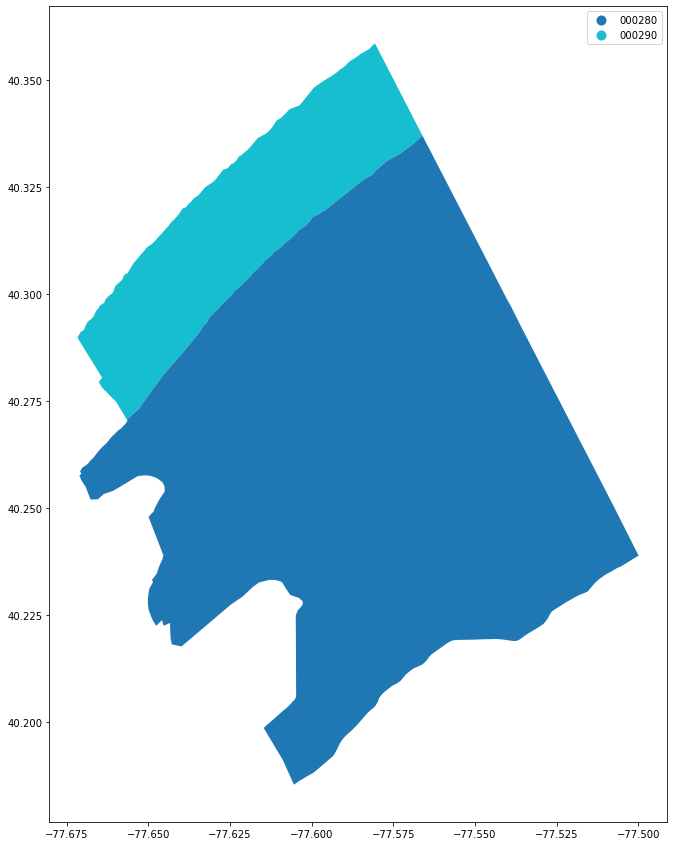

In [51]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("TOBOYNE"))&(shapefiles_census["COUNTYFP"]=="099")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("TOBOYNE"))&(vest_pa_16["COUNTYFP"]=="099")].plot(column="VTDST",legend=True,figsize=(15,15))

## Washington (New Eagle, Somerset)

<AxesSubplot:>

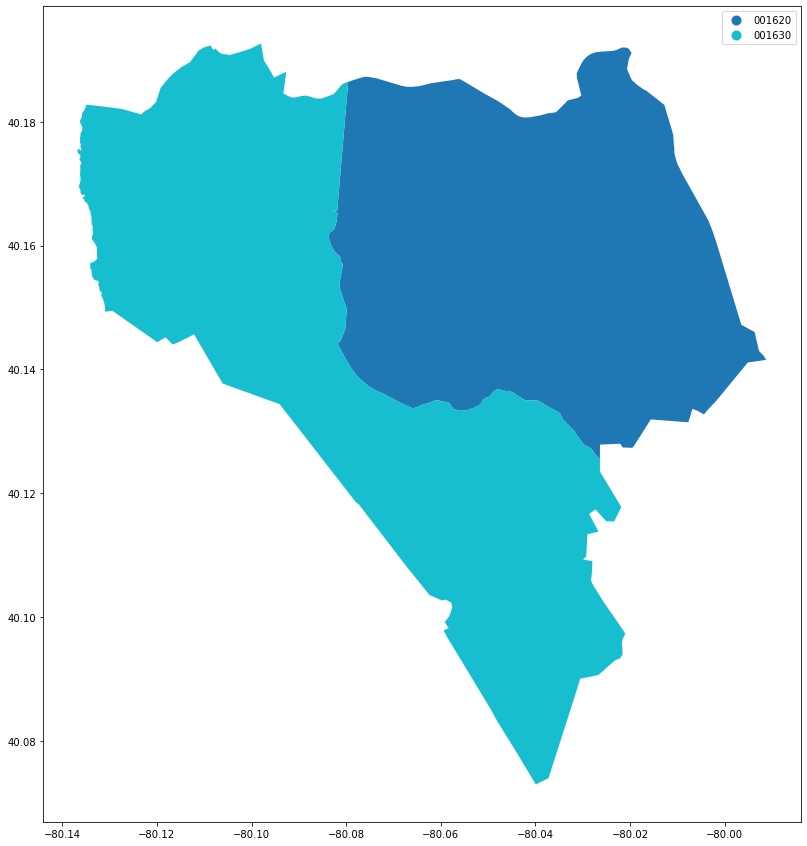

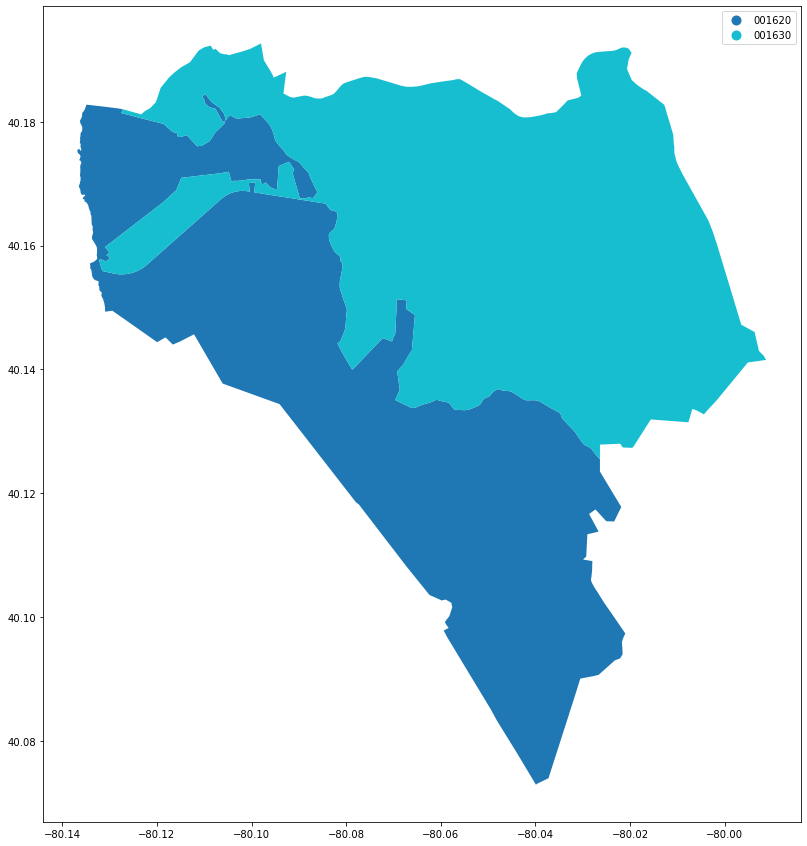

In [52]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("SOMERSET DISTRICT"))&(shapefiles_census["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("SOMERSET DISTRICT"))&(vest_pa_16["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))

<AxesSubplot:>

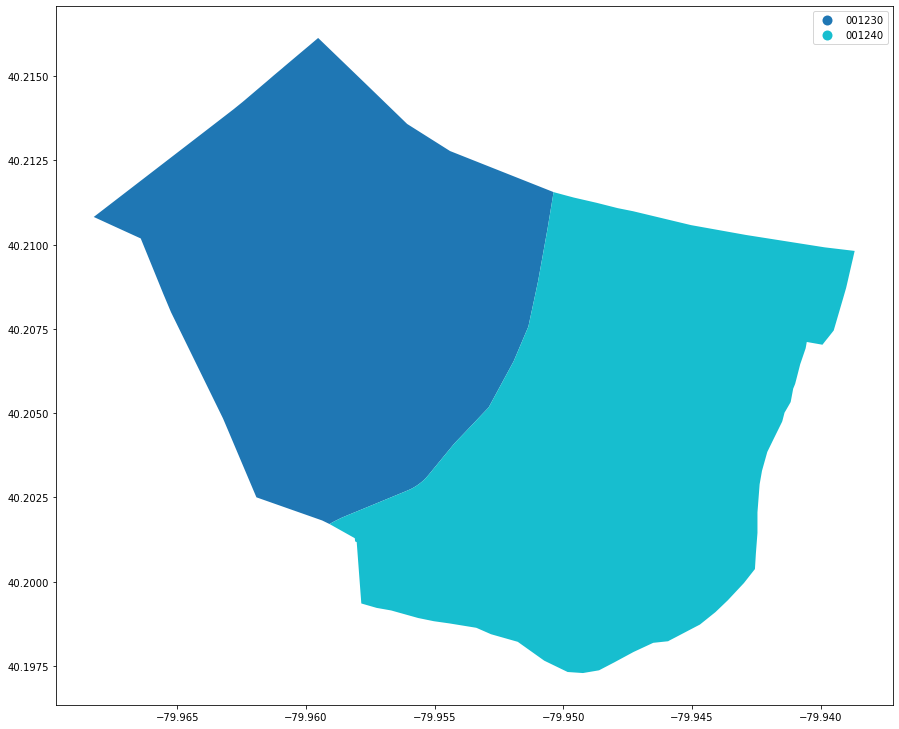

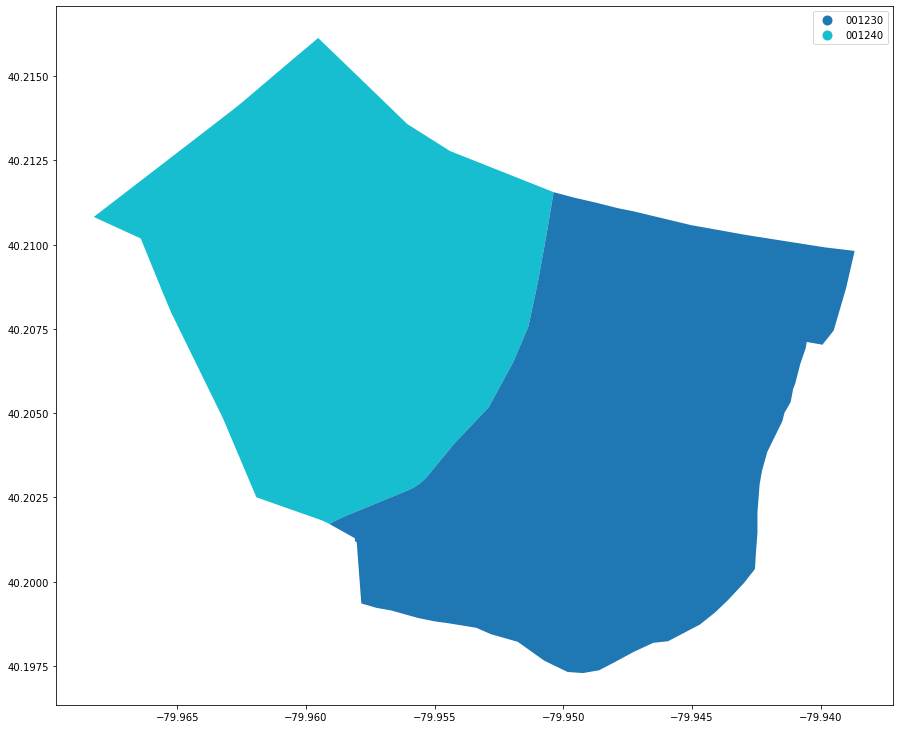

In [53]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("NEW EAGLE"))&(shapefiles_census["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("NEW EAGLE"))&(vest_pa_16["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))

## York (Fairview)

<AxesSubplot:>

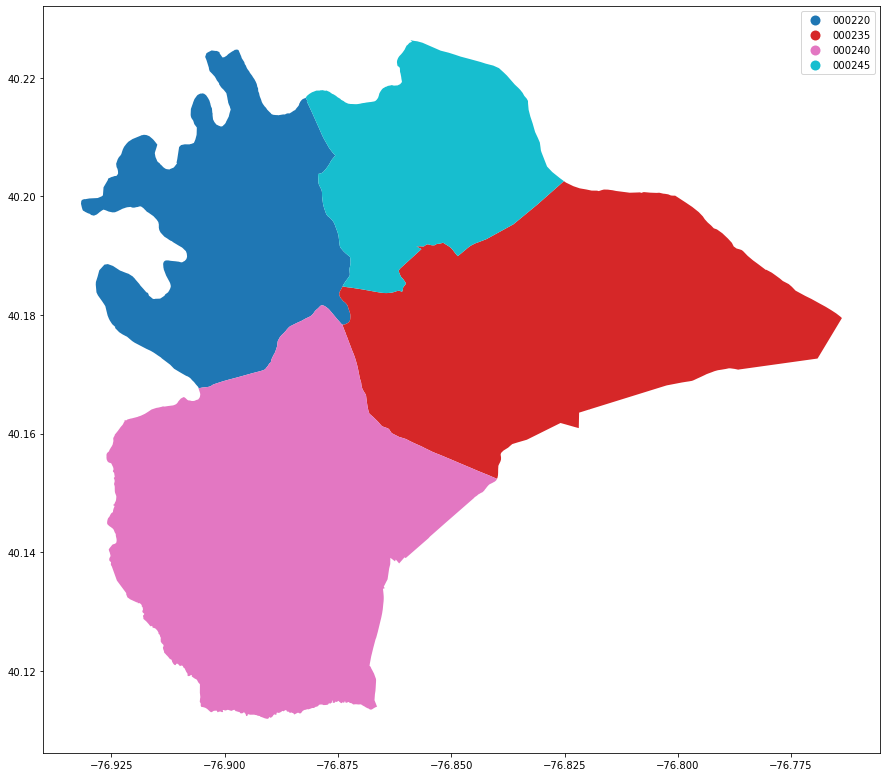

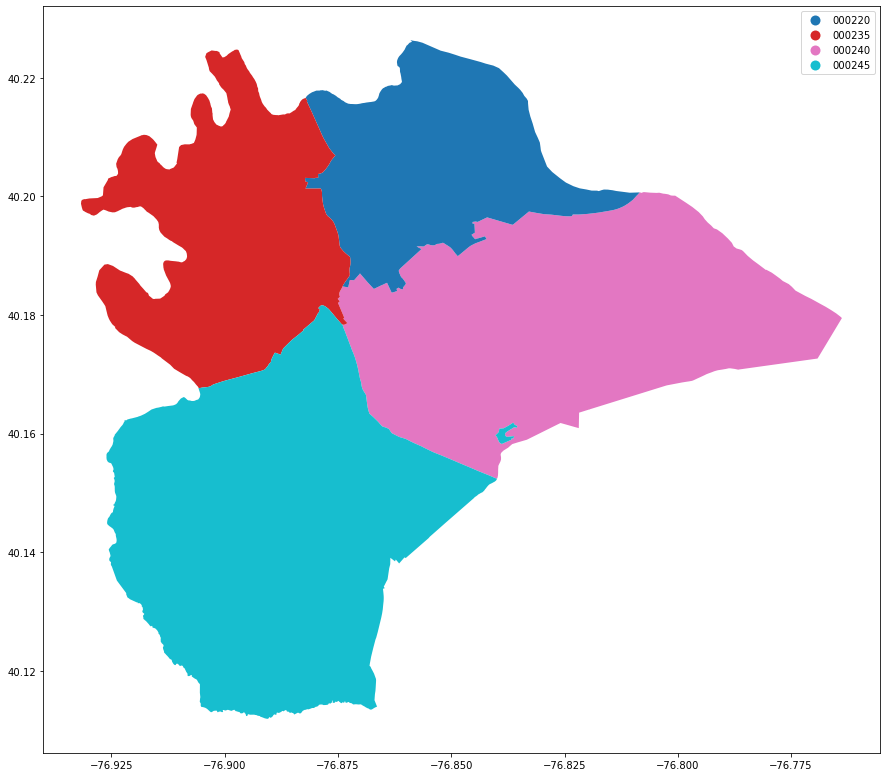

In [54]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("FAIRVIEW DISTRICT"))&(shapefiles_census["COUNTYFP"]=="133")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_16[(vest_pa_16["NAME"].str.contains("FAIRVIEW DISTRICT"))&(vest_pa_16["COUNTYFP"]=="133")].plot(column="VTDST",legend=True,figsize=(15,15))